In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
mydata = pd.read_csv('DataSetPenyakitJantung.csv')
mydata

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
mydata.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
mydata.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [12]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [14]:
mydata.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [16]:
numeric_data = mydata.select_dtypes(include=np.number)
outliers = {}
for col in numeric_data:
    Q1 = mydata[col].quantile(0.25)
    Q3 = mydata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = mydata[(mydata[col] < lower_bound) | (mydata[col] > upper_bound)].shape[0]

print(outliers)

{'id': 0, 'age': 0, 'trestbps': 28, 'chol': 183, 'thalch': 2, 'oldpeak': 16, 'ca': 20, 'num': 0}


In [18]:
print(numeric_data)

      id  age  trestbps   chol  thalch  oldpeak   ca  num
0      1   63     145.0  233.0   150.0      2.3  0.0    0
1      2   67     160.0  286.0   108.0      1.5  3.0    2
2      3   67     120.0  229.0   129.0      2.6  2.0    1
3      4   37     130.0  250.0   187.0      3.5  0.0    0
4      5   41     130.0  204.0   172.0      1.4  0.0    0
..   ...  ...       ...    ...     ...      ...  ...  ...
915  916   54     127.0  333.0   154.0      0.0  NaN    1
916  917   62       NaN  139.0     NaN      NaN  NaN    0
917  918   55     122.0  223.0   100.0      0.0  NaN    2
918  919   58       NaN  385.0     NaN      NaN  NaN    0
919  920   62     120.0  254.0    93.0      0.0  NaN    1

[920 rows x 8 columns]


In [20]:
means = numeric_data.mean()
means

id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64

In [22]:
medians = numeric_data.median()
medians

id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64

In [24]:
mode = numeric_data.mode().iloc[0]
mode

id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64

In [26]:
sample_std = numeric_data.std()
sample_std

id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64

In [28]:
sample_variance = numeric_data.var()
sample_variance

id          70610.000000
age            88.824691
trestbps      363.515007
chol        12272.387943
thalch        672.171813
oldpeak         1.190775
ca              0.875447
num             1.305748
dtype: float64

In [30]:
skewness = numeric_data.skew()
skewness

id          0.000000
age        -0.195994
trestbps    0.213334
chol       -0.613836
thalch     -0.211119
oldpeak     1.041427
ca          1.165978
num         0.968880
dtype: float64

In [32]:
kurtosis = numeric_data.kurt()
kurtosis

id         -1.200000
age        -0.382930
trestbps    2.958664
chol        0.062273
thalch     -0.479725
oldpeak     1.127069
ca          0.199498
num        -0.104325
dtype: float64

In [34]:
correlation_matrix = numeric_data.corr()

correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = correlation_matrix_no_diag.abs().max().max()

highest_corr_pair = correlation_matrix_no_diag.abs().stack().idxmax()

print("pasangan variable dengan kolerasi tertinggi:", highest_corr_pair)
print("nilai kolerasi teringgi:",max_corr)

pasangan variable dengan kolerasi tertinggi: ('ca', 'num')
nilai kolerasi teringgi: 0.5162163234345344


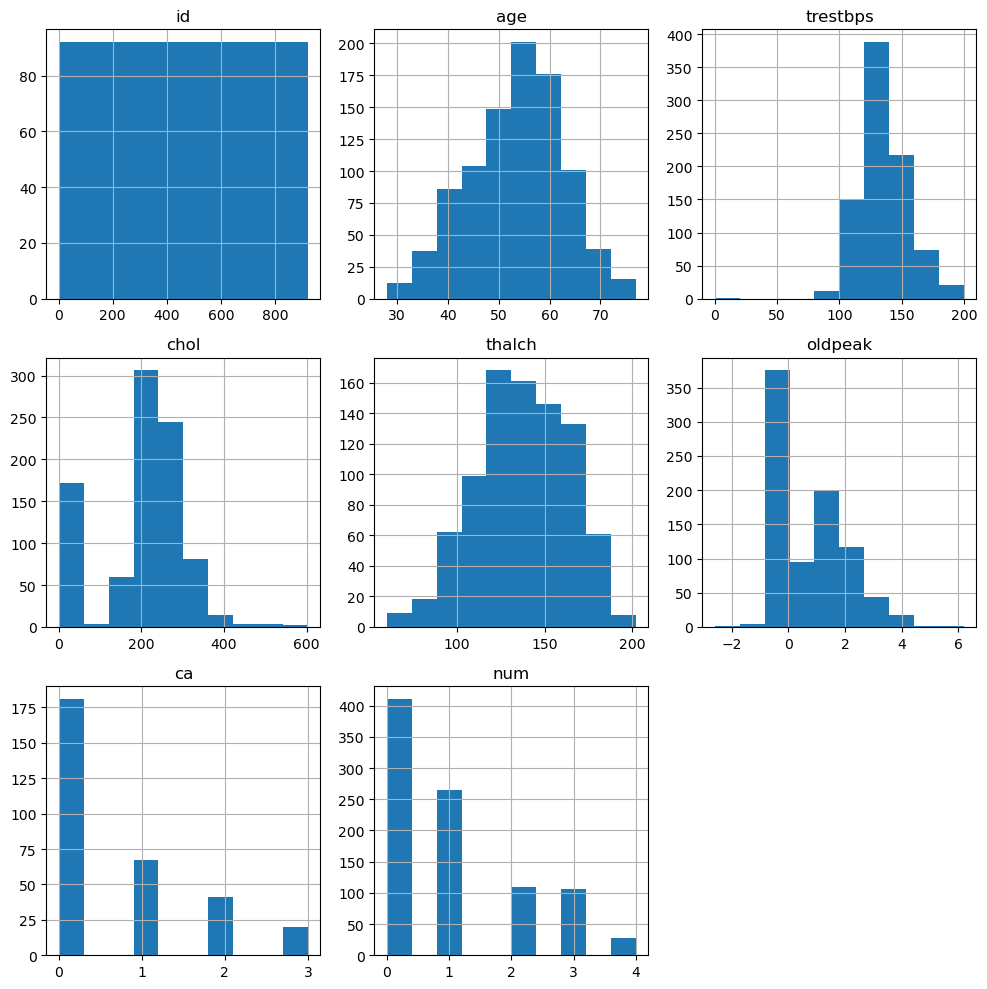

In [46]:
numeric_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

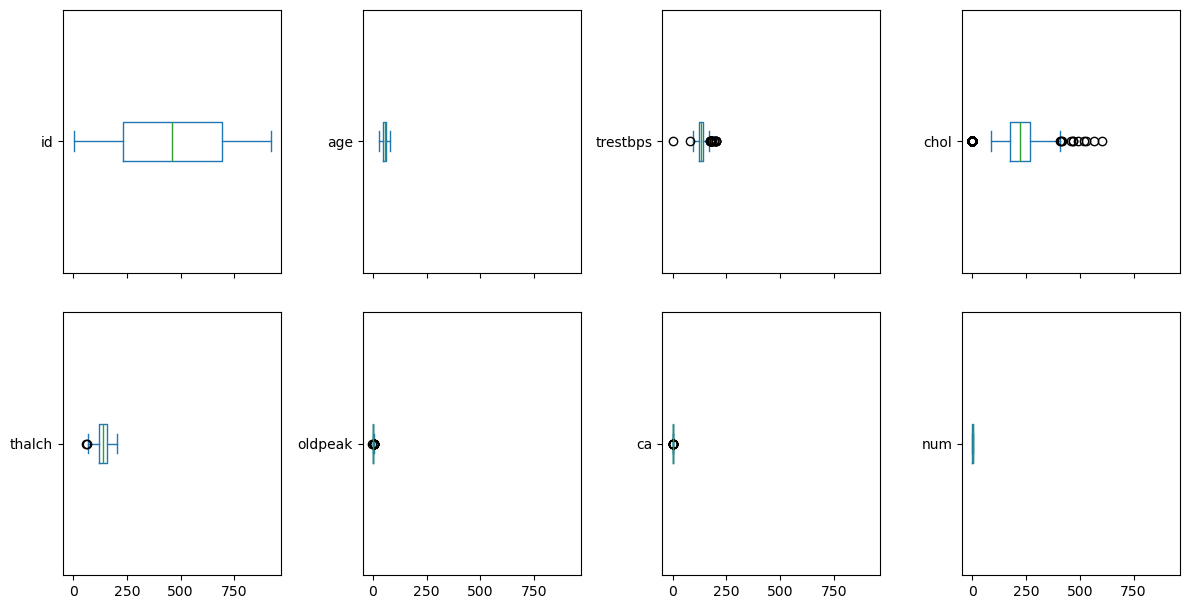

In [37]:
numeric_data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12), vert=False)
plt.tight_layout()
plt.show()

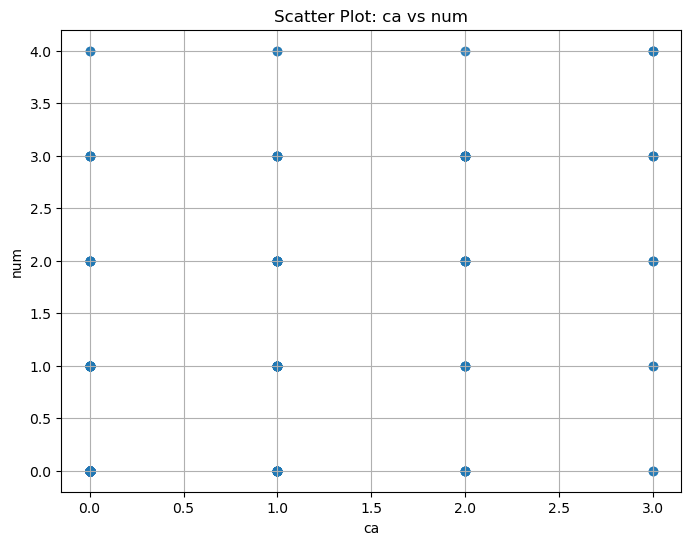

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(mydata['ca'], mydata['num'], alpha=0.6)
plt.title('Scatter Plot: ca vs num')
plt.xlabel('ca')
plt.ylabel('num')
plt.grid(True)
plt.show()

LAPORAN PRATIKUM :

Hasil dari eksplorasi dan analisis data menunjukkan bahwa terdapat 15 kolom yang dianalisis, dimana korelasi kuat ditemukan antara variabel ca dan num, nilai korelasi tertinggi adalah 0,516. Dari beberapa outlier, yaitu trestbps dengan nilai 128 dan chol dengan 183. Beberapa variabel berisi nilai yang hilang(missing value) yaitu trestbps dengan 59 nilai yang hilang(missing value), lalu chol dengan total nilai yang hilang(missing value) yakni 30.

Dari analisis data, beberapa variabel menunjukkan distibusi yang tidak normal, dengan skewness negatif untuk variabel yang paling penting, yaitu kolesterol dan NFS. Variabel ca dan thal masing-masing memiliki 4 dan 9 missing values yang menurutku cukup signifikan dan itu harus di-addressed sebelum melanjutkan analisis. Korelasi yang sangat signifikan pada dataset ini adalah ca (jumlah pembuluh darah utama yang diwarnai) dengan num (indikator keparahan penyakit), yaitu 0.516, yang berarti mereka memiliki hubungan yang cukup signifikan. Juga, Penemuan lain meliputi adanya outlier pada variabel seperti oldpeak, yang perlu ditangani untuk mencegah terjadinya kesalahan dalam hasil analisis.